In [3]:
import os
import pandas as pd

# Find the project root automatically (where 'data' folder is)
project_root = None
current_path = os.getcwd()

while True:
    if os.path.isdir(os.path.join(current_path, "data")):
        project_root = current_path
        break
    parent = os.path.dirname(current_path)
    if parent == current_path:  # reached filesystem root
        break
    current_path = parent

if project_root is None:
    raise FileNotFoundError("Could not find 'data' folder. Please check project structure.")

# Construct the full path to clean_comments.csv
csv_path = os.path.join(project_root, "data", "clean_comments.csv")

# Load the file
df = pd.read_csv(csv_path)

print(f"✅ Loaded {len(df)} comments from {csv_path}")
df.head()


✅ Loaded 1843 comments from C:\Users\HP 15 EQ2144AU R5\OneDrive\Desktop\reddit-sentiment-analysis-master\data\clean_comments.csv


,id,post_id,author,body,created_utc,score,clean_body,date
0,n87mps2,1mnuan1,riffito,"> Finally, this may be helpful for users who d...",2025-08-12 01:09:18+00:00,130,finally may helpful user speak english provide...,2025-08-12
1,n87kpas,1mnuan1,fiddle_n,Python 4 should have empty set as {} and empty...,2025-08-12 00:57:07+00:00,180,python empty set empty dict dont,2025-08-12
2,n87ldfm,1mnuan1,Beatlepoint,"> This can be confusing for beginners, especia...",2025-08-12 01:01:10+00:00,44,confusing beginner especially coming language ...,2025-08-12
3,n87mjoe,1mnuan1,s-to-the-am,"This seems like a bad option, I don’t know if ...",2025-08-12 01:08:16+00:00,46,seems like bad option dont know good one defin...,2025-08-12
4,n87iywh,1mnuan1,Qudit314159,A literal syntax for the empty set isn't a bad...,2025-08-12 00:46:46+00:00,56,literal syntax empty set isnt bad idea pretty ...,2025-08-12


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

# df is already loaded from cell 1
df.head()


,id,post_id,author,body,created_utc,score,clean_body,date
0,n87mps2,1mnuan1,riffito,"> Finally, this may be helpful for users who d...",2025-08-12 01:09:18+00:00,130,finally may helpful user speak english provide...,2025-08-12
1,n87kpas,1mnuan1,fiddle_n,Python 4 should have empty set as {} and empty...,2025-08-12 00:57:07+00:00,180,python empty set empty dict dont,2025-08-12
2,n87ldfm,1mnuan1,Beatlepoint,"> This can be confusing for beginners, especia...",2025-08-12 01:01:10+00:00,44,confusing beginner especially coming language ...,2025-08-12
3,n87mjoe,1mnuan1,s-to-the-am,"This seems like a bad option, I don’t know if ...",2025-08-12 01:08:16+00:00,46,seems like bad option dont know good one defin...,2025-08-12
4,n87iywh,1mnuan1,Qudit314159,A literal syntax for the empty set isn't a bad...,2025-08-12 00:46:46+00:00,56,literal syntax empty set isnt bad idea pretty ...,2025-08-12


In [6]:
analyzer = SentimentIntensityAnalyzer()

df['vader_compound'] = df['clean_body'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

def label_sentiment(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

df['sentiment'] = df['vader_compound'].apply(label_sentiment)
df['sentiment'].value_counts()


sentiment
positive    1103
neutral      444
negative     296
Name: count, dtype: int64

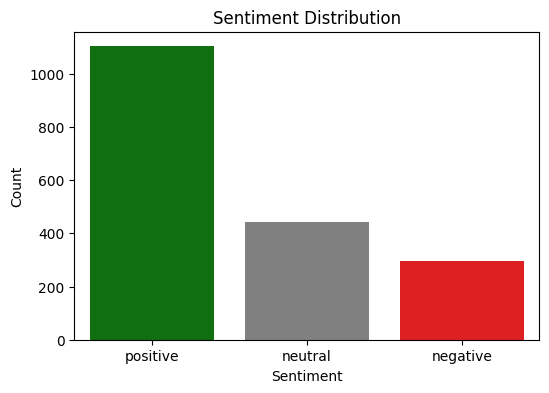

In [19]:
# Prepare data
sentiment_counts = df['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

# Plot with hue to avoid warning
plt.figure(figsize=(6,4))
sns.barplot(data=sentiment_counts, x='sentiment', y='count', hue='sentiment',
            palette={'positive': 'green', 'neutral': 'gray', 'negative': 'red'},
            dodge=False, legend=False)

plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()



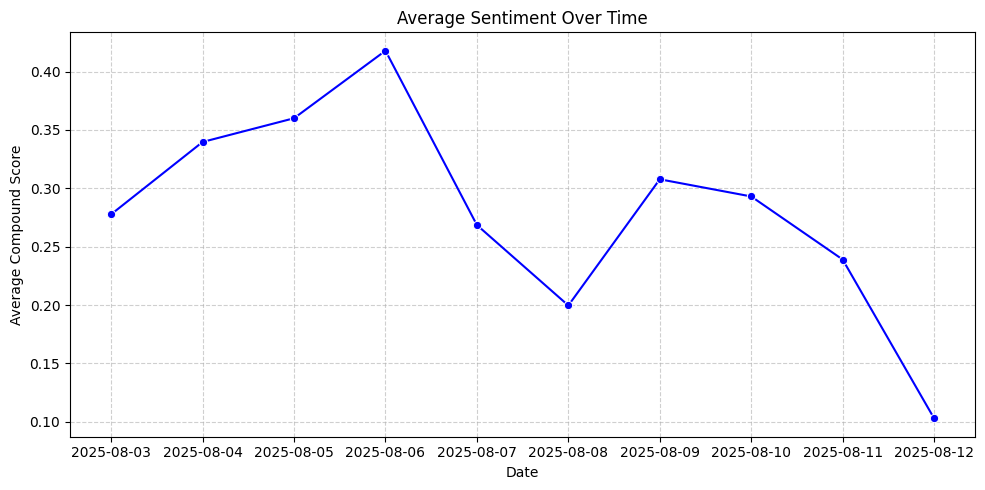

In [20]:
# Group by date and calculate mean sentiment score
daily_sentiment = df.groupby(['date'])['vader_compound'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(
    data=daily_sentiment,
    x='date', y='vader_compound',
    marker='o', color='blue'
)
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Compound Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

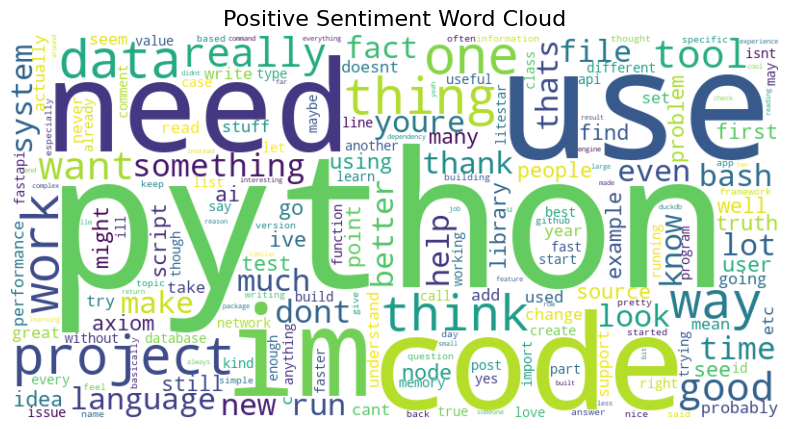

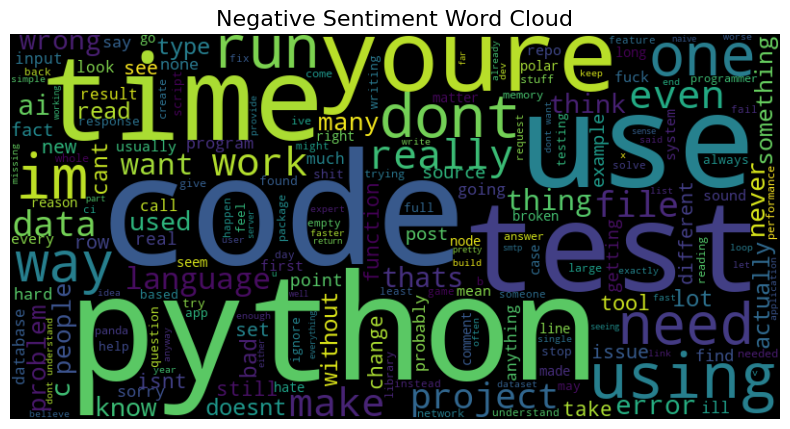

In [21]:
def plot_wordcloud(text, title, color="white"):
    wc = WordCloud(width=800, height=400, background_color=color, colormap='viridis').generate(" ".join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

plot_wordcloud(df[df['sentiment']=="positive"]['clean_body'], "Positive Sentiment Word Cloud")
plot_wordcloud(df[df['sentiment']=="negative"]['clean_body'], "Negative Sentiment Word Cloud", color="black")
